In [6]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.widgets import *
import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "0"
#os.environ["OMP_NUM_THREADS"] = "1"

import torch
torch.device("mps")

device(type='mps')

In [7]:
tank_types = 'mbt','ifv','spaag'
path = Path('tanks')
if not path.exists():
    path.mkdir()
    for o in tank_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o}', max_images=150)
        download_images(dest, urls=results)

In [8]:
fns = get_image_files(path)
failed = verify_images(fns)
failed
failed.map(Path.unlink);
len(failed)

0

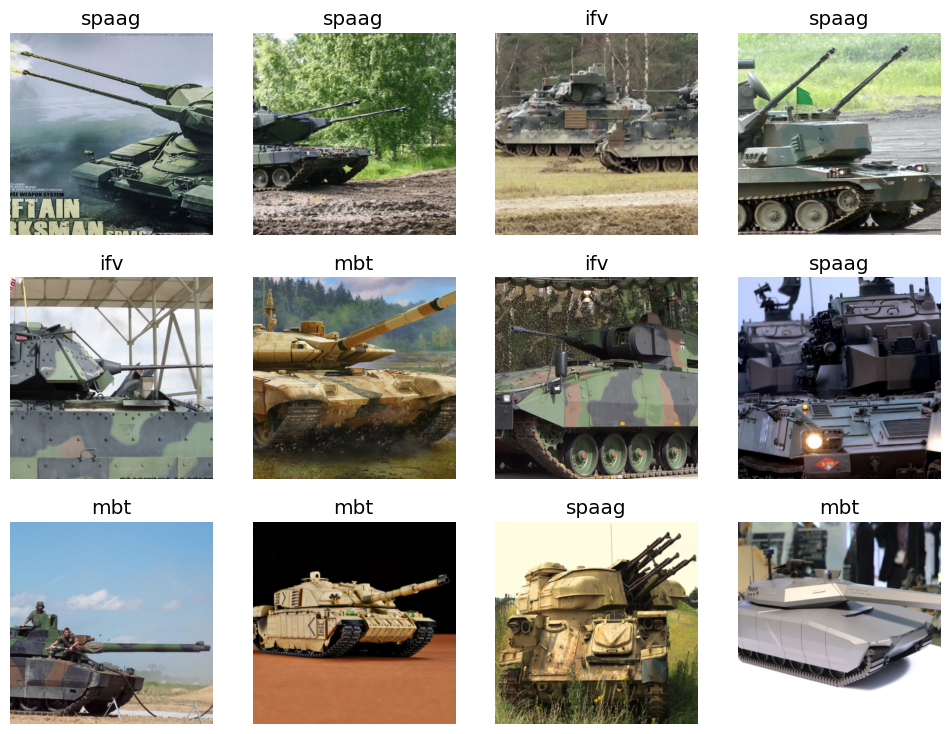

In [9]:
tanks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(400, min_scale=0.4),
    batch_tfms=aug_transforms
    )
dls = tanks.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3)



In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
cleaner.delete()

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)